In [2]:
%cd ..

C:\Users\ilyap\dev\python\python


In [32]:
from investments import moex
from investments import instruments
import numpy as np
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
%matplotlib notebook

In [34]:
sns.set()

In [40]:
usd=instruments.OLHCSeries.load_from_csv(r"C:\Users\ilyap\dev\python\python\investments\USD000UTSTOM.csv")
eur=instruments.OLHCSeries.load_from_csv(r"C:\Users\ilyap\dev\python\python\investments\EUR_RUB__TOM.csv")

In [41]:
df_usd=pd.DataFrame(usd.olhc_series)
df_usd=df_usd.set_index("date")
df_eur=pd.DataFrame(eur.olhc_series)
df_eur=df_eur.set_index("date")

In [42]:
df_usd.describe()

,open,low,high,close,num_trades,volume,waprice
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4.412000e+03,4412.000000
mean,41.677493,41.467258,41.896972,41.680685,17489.847461,1.361384e+11,41.682379
std,17.118266,16.935140,17.311063,17.116579,20676.387704,9.685133e+10,17.119836
min,23.110000,23.057500,23.152500,23.102500,31.000000,3.514546e+08,23.099600
25%,28.617500,28.570000,28.645000,28.620000,899.500000,6.156197e+10,28.608325
50%,31.356000,31.232500,31.489550,31.361750,11310.500000,1.279448e+11,31.357200
75%,60.401000,59.883750,61.064375,60.448750,27241.750000,1.899950e+11,60.561100
max,82.303000,81.750000,85.999000,82.630000,141492.000000,8.164174e+11,83.834400


In [43]:
df_eur.describe()

,open,low,high,close,num_trades,volume,waprice
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3.888000e+03,3888.000000
mean,52.868679,52.590055,53.153522,52.864742,2900.501029,1.508661e+10,52.865079
std,17.181096,16.973644,17.410747,17.184412,3230.531176,1.244778e+10,17.185325
min,33.320100,33.000000,33.345000,33.330000,9.000000,2.053429e+07,33.331400
25%,39.029975,38.911625,39.128675,39.018750,436.000000,5.612579e+09,39.029650
50%,43.952500,43.830750,44.078750,43.928750,1266.500000,1.245839e+10,43.948850
75%,70.470000,70.014375,70.800000,70.435625,5147.000000,2.242459e+10,70.446000
max,93.615000,92.952500,100.740000,93.775000,23195.000000,1.061776e+11,93.722200


In [44]:
medians_usd=[(year,
  df_usd[date(year,12,20):date(year,12,31)]["close"].median(),
  df_usd[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2003,2020)]
medians_eur=[(year,
  df_eur[date(year,12,20):date(year,12,31)]["close"].median(),
  df_eur[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2005,2020)]

In [45]:
df_medians_usd = pd.DataFrame(medians_usd, columns=["year", 
                                            "median at last days of year", 
                                            "median at first days of next year"]).set_index("year")
df_medians_eur = pd.DataFrame(medians_eur, columns=["year", 
                                            "median at last days of year", 
                                            "median at first days of next year"]).set_index("year")

In [46]:
df_medians_usd["increase"]=df_medians_usd["median at first days of next year"]/df_medians_usd["median at last days of year"]-1.0
df_medians_eur["increase"]=df_medians_eur["median at first days of next year"]/df_medians_eur["median at last days of year"]-1.0

In [47]:
df_medians_usd["buy in december?"] = df_medians_usd["increase"] > 0.05
df_medians_eur["buy in december?"] = df_medians_eur["increase"] > 0.05

In [48]:
df_medians_usd

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2003,29.24500,28.8750,-0.012652,False
2004,27.83375,28.0062,0.006196,False
2005,28.80000,28.3400,-0.015972,False
2006,26.34000,26.5625,0.008447,False
2007,24.71000,24.3630,-0.014043,False
2008,28.68375,32.0400,0.117009,True
2009,30.13000,29.5640,-0.018785,False
2010,30.57000,30.0050,-0.018482,False
2011,31.72000,31.5600,-0.005044,False


In [49]:
df_medians_eur

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2005,34.18250,34.37000,0.005485,False
2006,34.65750,34.37000,-0.008295,False
2007,35.61500,36.04000,0.011933,False
2008,40.17625,42.08875,0.047603,False
2009,43.24875,42.58300,-0.015394,False
2010,40.08000,39.97000,-0.002745,False
2011,41.20000,40.38000,-0.019903,False
2012,40.41000,40.35000,-0.001485,False
2013,44.78500,45.47800,0.015474,False


In [50]:
df_usd

,open,low,high,close,num_trades,volume,waprice
date,,,,,,,
2003-04-15,31.1850,31.1850,31.1975,31.1970,55,1.132583e+09,31.1912
2003-04-16,31.1950,31.1850,31.1950,31.1885,65,7.289744e+08,31.1901
2003-04-17,31.1800,31.1700,31.2000,31.1975,63,1.879374e+09,31.1872
2003-04-18,31.1975,31.1800,31.1975,31.1801,51,1.053497e+09,31.1824
2003-04-21,31.1065,31.1000,31.1100,31.1025,47,5.165712e+08,31.1019
...,...,...,...,...,...,...,...
2020-12-24,75.0675,73.8400,75.4600,73.8950,67046,2.466003e+11,74.4480
2020-12-25,73.6425,73.6225,74.2250,74.1700,34947,1.103823e+11,73.9219
2020-12-28,74.1425,73.5275,74.1425,73.7700,55165,2.039614e+11,73.7260


In [51]:
df_eur

,open,low,high,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.790,34.7701,34.8300,34.8100,21,1.572245e+08,34.8073
2005-06-21,34.665,34.5775,34.6750,34.5850,29,1.642754e+08,34.6353
2005-06-22,34.780,34.7200,34.8150,34.7200,23,1.136216e+08,34.7679
2005-06-23,34.680,34.6000,34.6800,34.6200,25,1.909008e+08,34.6316
2005-06-24,34.520,34.5200,34.6200,34.5600,24,7.324768e+07,34.5671
...,...,...,...,...,...,...,...
2020-12-24,91.600,89.9600,91.7375,90.0950,8978,3.996634e+10,90.8619
2020-12-25,90.095,89.7700,90.6675,90.5650,10352,4.883437e+10,90.0382
2020-12-28,90.560,89.8450,90.6800,90.0550,9023,4.837377e+10,90.0865


In [18]:
plt.style.use('seaborn-whitegrid')

In [55]:
df_eur["close"].rolling(window=10).mean()

date
2005-06-20         NaN
2005-06-21         NaN
2005-06-22         NaN
2005-06-23         NaN
2005-06-24         NaN
                ...   
2020-12-24    90.12325
2020-12-25    90.33875
2020-12-28    90.37525
2020-12-29    90.51900
2020-12-30    90.73225
Name: close, Length: 3888, dtype: float64

<IPython.core.display.Javascript object>


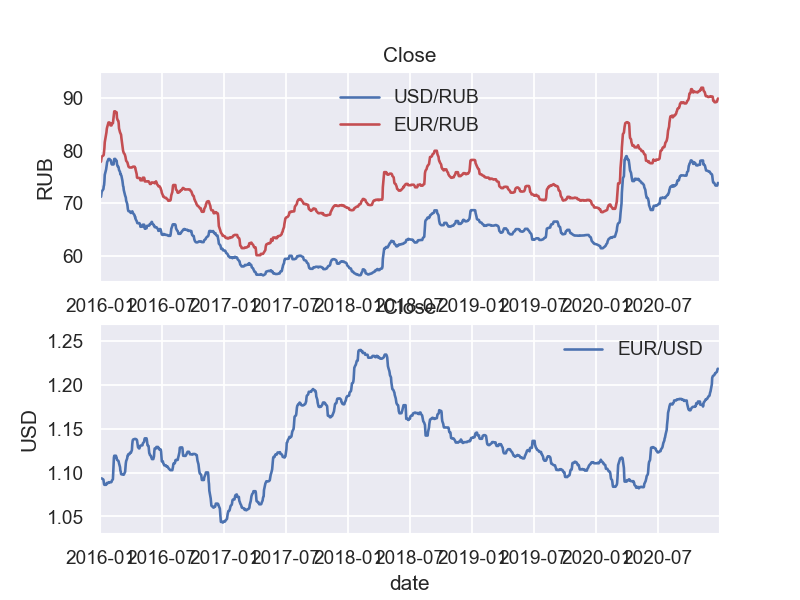

In [39]:
fig, ax = plt.subplots(2)
ax[0].plot(df_usd.index, df_usd["close"].rolling(window=10).median(),'b',label='USD/RUB')
ax[0].plot(df_eur.index, df_eur["close"].rolling(window=10).median(),'r',label='EUR/RUB')
ax[0].set(xlim=(date(2016,1,1),date(2020,12,31)), ylim=(55,95), xlabel='date', ylabel='RUB', title='Close')
leg=ax[0].legend()
ax[1].plot(df_usd.index, (df_eur["close"]/df_usd["close"]).rolling(window=10).median(),'b',label='EUR/USD')
ax[1].set(xlim=(date(2016,1,1),date(2020,12,31)), ylim=(1.03,1.27), xlabel='date', ylabel='USD', title='Close')
ax[1].legend()

In [24]:
import bisect

In [29]:
bisect.bisect_left([2,5,7,8], 9)

4